In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

In [2]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import train_test_split
else:
    from sklearn.model_selection import train_test_split

In [3]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

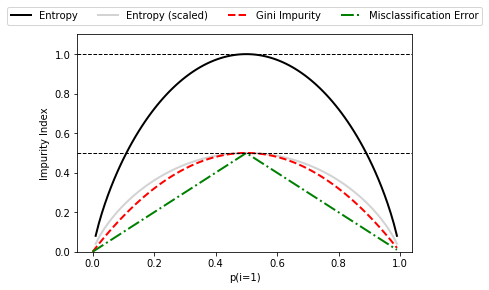

In [4]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,
    linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [5]:
data = pd.read_csv('Treasury Squeeze test - DS1.csv')       # Read data to a pandas dataframe
data.set_index('rowindex', inplace=True)                   # Set rowindex column as dataframe index 
data.drop('contract', axis=1, inplace=True)                # Drop contract column
data['squeeze'] = data['squeeze'].map({True:1, False:0})  # process True and False in squeeze column
data.head()

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
rowindex,,,,,,,,,,
1,0,1,0,1,1,1,1,0,0,1
2,0,1,1,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,1,1
5,0,0,1,1,1,1,1,0,0,0


In [6]:
# Split train and test data
X = data[data.columns[:9]]
y = data['squeeze']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, y_train.shape)

(603, 9) (603,)


In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [8]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

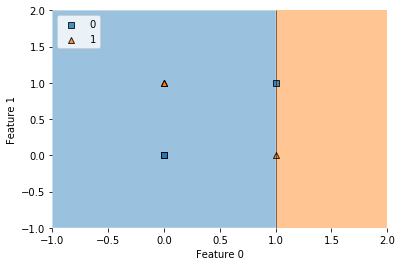

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_combined, y_combined, clf=tree, 
                      filler_feature_values={2: 1, 3:1, 4:0, 5:0, 6:0, 7:0, 8:0},
                      filler_feature_ranges={2: 1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1})
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(loc='upper left')
plt.show()

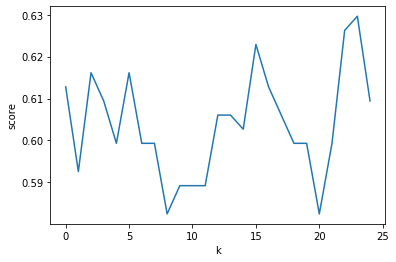

In [10]:
from sklearn import metrics
k_range = range(1, 26)
scores = []
for k in k_range:
    knn_test = KNeighborsClassifier(n_neighbors=k)
    knn_test.fit(X_train, y_train)
    y_pred = knn_test.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.xlabel('k')
plt.ylabel('score')
plt.plot(scores)

In [11]:
print("My name is Xu Zhang")
print("My NetID is: xuz4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xu Zhang
My NetID is: xuz4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
